In [63]:
import gzip
import pickle
from tensorflow import keras
import numpy as np
from google.colab import files
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
uploaded=files.upload()

Saving flatland_train.data to flatland_train (1).data


In [8]:
def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

In [9]:
path = 'flatland_train.data'
X, y = pickle.load(gzip.open(path, 'rb')) #(10000,50,50)

#data pre-proc
y[y != 0] -= 2 #jei klasė ne nulis, atimk iš jos 2, labels from (0, 4)
X = X / 255. #normalizuojam data, kad pixeliai butu rezyje (0,1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.shape

(7000, 50, 50)

In [24]:
X_test.shape

(3000, 50, 50)

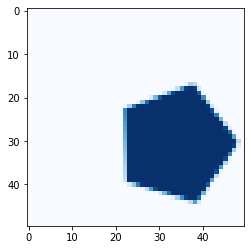

In [32]:
plt.imshow(X_test[5], cmap='Blues')

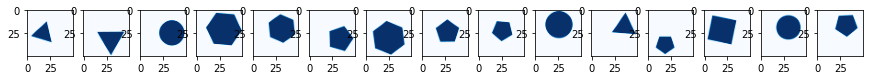

In [37]:
plt.figure(figsize=(15,15))
for i in range(15):
  plt.subplot(15,15,15+i+1)
  plt.imshow(X_test[i], cmap='Blues')
plt.show()

In [38]:
Counter(y)

Counter({0.0: 1381, 1.0: 2853, 2.0: 1868, 3.0: 2137, 4.0: 1761})

In [39]:
y

array([2., 4., 3., ..., 4., 4., 3.])

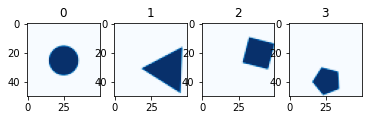

In [41]:
for i in range (4):
  idx=np.where(y_train==i)[0][0]
  plt.subplot (1,4, i+1)
  plt.imshow(X_train[idx], cmap='Blues')
  plt.title(i)
plt.show()

In [56]:
model = keras.models.Sequential()
#All data pre-processing should be in keras model
model.add(keras.layers.Flatten(input_shape=(50,50)))#(10000, 2500)
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(170, activation='relu'))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dense(130, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(90, activation='relu'))
model.add(keras.layers.Dense(80, activation='relu'))
model.add(keras.layers.Dense(70, activation='relu'))
model.add(keras.layers.Dense(60, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
#if using categorical_crossentropy - expects one hot encoded output
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 2500)              0         
                                                                 
 dense_29 (Dense)            (None, 200)               500200    
                                                                 
 dense_30 (Dense)            (None, 170)               34170     
                                                                 
 dense_31 (Dense)            (None, 150)               25650     
                                                                 
 dense_32 (Dense)            (None, 130)               19630     
                                                                 
 dense_33 (Dense)            (None, 100)               13100     
                                                                 
 dense_34 (Dense)            (None, 90)               

In [59]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
219/219 [==============================] - 2s 8ms/step - loss: 0.2964 - accuracy: 0.8823 - val_loss: 0.7761 - val_accuracy: 0.7683
Epoch 2/50
219/219 [==============================] - 1s 7ms/step - loss: 0.3212 - accuracy: 0.8709 - val_loss: 0.6897 - val_accuracy: 0.7703
Epoch 3/50
219/219 [==============================] - 1s 7ms/step - loss: 0.2988 - accuracy: 0.8843 - val_loss: 0.6260 - val_accuracy: 0.7893
Epoch 4/50
219/219 [==============================] - 1s 7ms/step - loss: 0.2903 - accuracy: 0.8850 - val_loss: 0.6079 - val_accuracy: 0.7960
Epoch 5/50
219/219 [==============================] - 2s 7ms/step - loss: 0.3128 - accuracy: 0.8774 - val_loss: 0.6177 - val_accuracy: 0.8020
Epoch 6/50
219/219 [==============================] - 2s 7ms/step - loss: 0.2996 - accuracy: 0.8840 - val_loss: 0.6109 - val_accuracy: 0.8053
Epoch 7/50
219/219 [==============================] - 1s 7ms/step - loss: 0.2995 - accuracy: 0.8864 - val_loss: 0.7134 - val_accuracy: 0.7653
Epoch 

In [60]:
pred = model.predict(X_test).argmax(axis=1)
print ('Test set accuracy - {0:.02%}'.format((pred == y_test).mean()))

Test set accuracy - 85.30%


In [61]:
model.save('model.h5')

In [62]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.9453

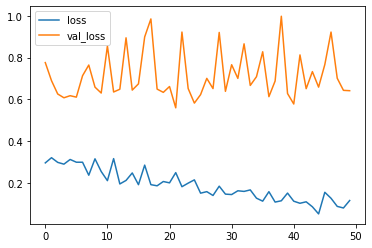

In [64]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

Epoch 1/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0307 - accuracy: 0.9931 - val_loss: 0.5831 - val_accuracy: 0.8787
Epoch 2/50
45/45 [==============================] - 0s 10ms/step - loss: 0.0184 - accuracy: 0.9970 - val_loss: 0.5918 - val_accuracy: 0.8830
Epoch 3/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0148 - accuracy: 0.9983 - val_loss: 0.6035 - val_accuracy: 0.8840
Epoch 4/50
45/45 [==============================] - 0s 10ms/step - loss: 0.0131 - accuracy: 0.9984 - val_loss: 0.6093 - val_accuracy: 0.8830
Epoch 5/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.9981 - val_loss: 0.6108 - val_accuracy: 0.8847
Epoch 6/50
45/45 [==============================] - 0s 10ms/step - loss: 0.0111 - accuracy: 0.9981 - val_loss: 0.6211 - val_accuracy: 0.8887
Epoch 7/50
45/45 [==============================] - 0s 10ms/step - loss: 0.0103 - accuracy: 0.9986 - val_loss: 0.6284 - val_accuracy: 0.8863
Epoch 8/50
45/4

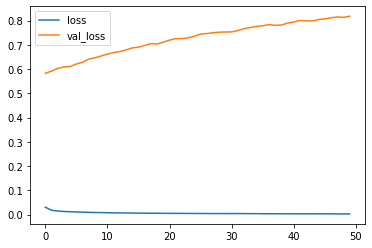

In [65]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50, batch_size=156)
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

In [66]:
model = keras.models.Sequential()
#All data pre-processing should be in keras model
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape=[50,50,1]))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(80, activation='relu'))
model.add(keras.layers.Dense(70, activation='relu'))
model.add(keras.layers.Dense(60, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
#if using categorical_crossentropy - expects one hot encoded output
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 32)       128       
 hNormalization)                                                 
                                                      

In [67]:
loss=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200)

Epoch 1/50
35/35 [==============================] - 9s 41ms/step - loss: 2.1494 - accuracy: 0.2321 - val_loss: 2.2519 - val_accuracy: 0.2833
Epoch 2/50
35/35 [==============================] - 1s 32ms/step - loss: 1.7506 - accuracy: 0.3694 - val_loss: 2.2051 - val_accuracy: 0.2830
Epoch 3/50
35/35 [==============================] - 1s 32ms/step - loss: 1.4137 - accuracy: 0.4416 - val_loss: 2.1685 - val_accuracy: 0.2833
Epoch 4/50
35/35 [==============================] - 1s 32ms/step - loss: 1.2582 - accuracy: 0.4837 - val_loss: 2.1351 - val_accuracy: 0.3160
Epoch 5/50
35/35 [==============================] - 1s 32ms/step - loss: 1.1791 - accuracy: 0.5059 - val_loss: 2.1000 - val_accuracy: 0.3230
Epoch 6/50
35/35 [==============================] - 1s 32ms/step - loss: 1.1305 - accuracy: 0.5291 - val_loss: 2.0608 - val_accuracy: 0.3100
Epoch 7/50
35/35 [==============================] - 1s 32ms/step - loss: 1.0567 - accuracy: 0.5604 - val_loss: 2.0152 - val_accuracy: 0.2107
Epoch 8/50
35

In [69]:
pred=model.predict(X_test).argmax(axis=1)
print('Test set accuracy - {0:.02%}'.format((pred==y_test).mean()))

Test set accuracy - 93.43%


In [70]:
model.save('model2.h5')

In [72]:
model = keras.models.load_model('model2.h5')
evaluate('flatland_train.data', model)

0.9792

In [74]:
model = keras.models.Sequential()
#All data pre-processing should be in keras model
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape=[50,50,1]))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
#if using categorical_crossentropy - expects one hot encoded output
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 22, 22, 32)       128       
 hNormalization)                                                 
                                                      

In [75]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=50)

Epoch 1/50
219/219 [==============================] - 4s 13ms/step - loss: 1.3912 - accuracy: 0.4531 - val_loss: 2.1537 - val_accuracy: 0.1960
Epoch 2/50
219/219 [==============================] - 2s 10ms/step - loss: 1.0016 - accuracy: 0.5877 - val_loss: 2.1927 - val_accuracy: 0.2017
Epoch 3/50
219/219 [==============================] - 2s 11ms/step - loss: 0.7220 - accuracy: 0.7159 - val_loss: 0.8592 - val_accuracy: 0.6513
Epoch 4/50
219/219 [==============================] - 3s 12ms/step - loss: 0.5368 - accuracy: 0.7990 - val_loss: 0.6482 - val_accuracy: 0.7483
Epoch 5/50
219/219 [==============================] - 2s 10ms/step - loss: 0.4032 - accuracy: 0.8597 - val_loss: 0.5558 - val_accuracy: 0.7943
Epoch 6/50
219/219 [==============================] - 3s 12ms/step - loss: 0.2800 - accuracy: 0.9184 - val_loss: 0.6764 - val_accuracy: 0.7700
Epoch 7/50
219/219 [==============================] - 3s 12ms/step - loss: 0.2356 - accuracy: 0.9303 - val_loss: 0.6745 - val_accuracy: 0.7777

In [78]:
pred = model.predict(X_test).argmax(axis=1)
print('Test set accuracy - {0:.02%}'.format((pred ==y_test).mean()))

Test set accuracy - 95.03%


In [79]:
model.save('model3.h5')

In [80]:
model = keras.models.load_model('model3.h5')
evaluate('flatland_train.data', model)

0.9851